In [107]:
import sys
sys.path.append('../src')

import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
from iecdt.data import geom
import geoplot as gplt
import numpy as np
from glob import glob
import pandas as pd
from joblib import Parallel, delayed
world = geom.get_world()
from IPython.display import Markdown



## read all image embeddings

In [ ]:
files = glob('/opt/data/dora/embeddings/consolidated/*')
def readf(fname):
    with open(fname, 'rb') as f:
        z = pickle.load(f)
        
    return {k: z[k] for k in ['chip_id', 'image_embedding', 'lonlat']}

embs = Parallel(verbose=5, n_jobs=-1)(delayed(readf)(fname) for fname in files)
embs = pd.DataFrame(embs)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 10752 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 12624 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 14784 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 17232 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 19968 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 22992 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 30592 tasks      | elapsed:   43.2s


## create an array with all vectors for searching

In [18]:
vdb = np.r_[[np.r_[i] for i in embs.image_embedding.values]]
vdb.shape

(48313, 1024)

In [15]:
embs.head()

,chip_id,image_embedding,lonlat
0,00217e53ae025,"[-0.082963206, -0.5928865, -0.3113225, 0.02699...","(23.528842211411103, 15.450666195202487)"
1,305c4716ab785,"[-0.059955753, -0.42327213, -0.52105796, -0.36...","(54.821557935421026, 62.755649953351664)"
2,0ac172540e823,"[-0.053768303, -0.5350761, -0.32197216, -0.173...","(85.53991161186431, 26.485483925845262)"
3,087a4afcebe35,"[-0.015472494, 0.28247878, -0.07816893, 0.0456...","(147.8775275593774, 64.562401914625)"
4,1bacb25ff4da4,"[-0.06398575, -0.6319977, -0.26861238, -0.0290...","(0.8942767029818856, 15.970550853338139)"


## select a random image

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

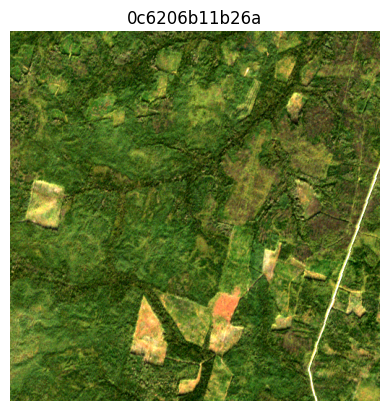

In [100]:
file = np.random.choice(files)
with open(file, 'rb') as f:
    z = pickle.load(f)
plt.imshow(z['img'])
plt.title(z['chip_id'])
plt.axis('off')


## get the top 20 most similar

In [101]:
distances = np.sum((vdb - z['image_embedding'])**2, axis=1)
top20_idxs = np.argsort(distances)[:20]

In [102]:
top20 = embs.iloc[top20_idxs].copy()
top20['distance'] = distances[top20_idxs]
top20

,chip_id,image_embedding,lonlat,distance
40691,0c6206b11b26a,"[-0.06916016, -0.44529805, -0.54476583, -0.235...","(55.040546730154716, 61.41482349027339)",0.000000
3531,1131b499f2031,"[-0.08159786, -0.47401074, -0.5399126, -0.2107...","(-83.15191469486147, 49.269078260466785)",0.230729
45555,2aeb9f7d94cb4,"[-0.06581831, -0.46770468, -0.52447164, -0.191...","(-83.94462817140304, 44.53140721777647)",0.289644
14585,12415d99f97a9,"[-0.070689134, -0.45601922, -0.55055314, -0.18...","(54.50222283286613, 61.75182253573449)",0.301661
37611,2f2d431aa2c66,"[-0.07169956, -0.45575947, -0.5220067, -0.2217...","(54.066168365740666, 59.88960090142329)",0.303248
29784,14c091d27f336,"[-0.093009345, -0.49960995, -0.5588164, -0.288...","(28.637004136088468, 3.2874949088594616)",0.306433
622,2e207c6e9627d,"[-0.07071323, -0.46779877, -0.5156816, -0.2881...","(62.64776061895681, 61.39375325265104)",0.310209
43215,0aab74b171781,"[-0.0774225, -0.5011847, -0.5268913, -0.264271...","(28.729219366425955, 3.3336383356625072)",0.312056
25963,121683e385cec,"[-0.09562732, -0.4665774, -0.5479902, -0.26054...","(62.935977515726435, 61.07243691486549)",0.321219
16365,309b95a84803e,"[-0.078939855, -0.49341056, -0.5123536, -0.227...","(-43.24776800640403, -3.905629983515141)",0.348202


In [103]:
# the most similar one must be the query chip itself

assert top20.chip_id.values[0] == z['chip_id']

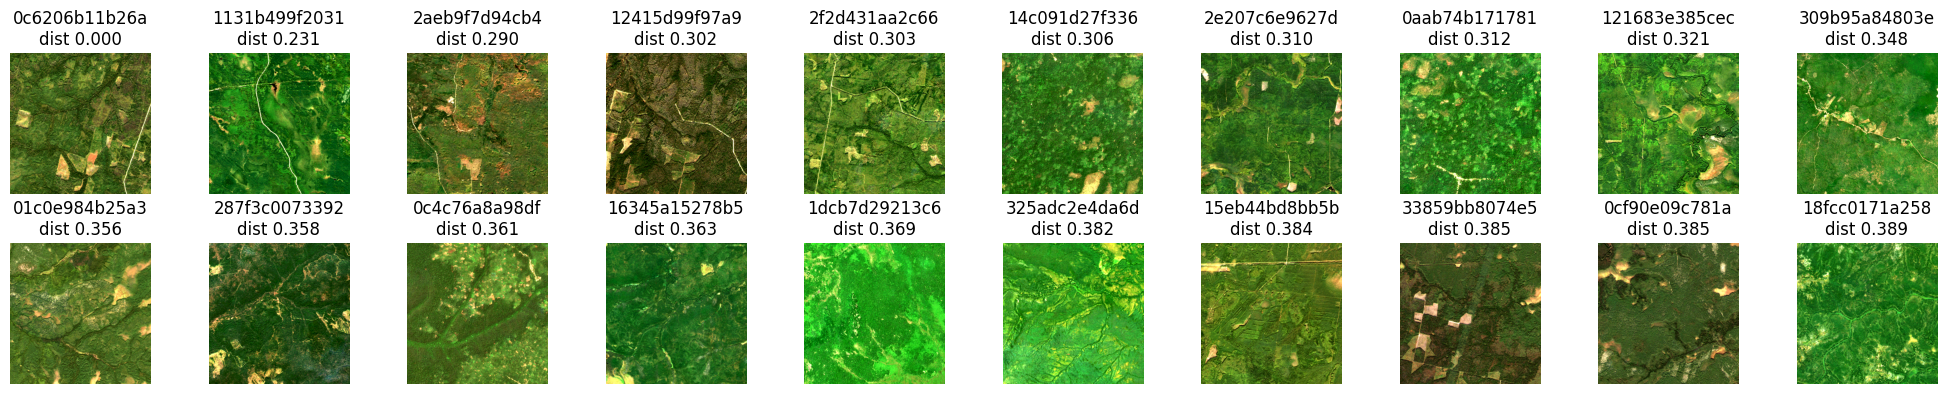

In [104]:
fig = plt.figure(figsize=(20,4))
axs = fig.subplots(2,10).flatten()

for i, (_, ti) in enumerate(top20.iterrows()):
    file = files[ti.name]
    ax = axs[i]

    # sanity check, chip id must be the same as file if
    assert file.split('/')[-1].split('.')[0] == ti.chip_id

    with open(file, 'rb') as f:
        z = pickle.load(f)    

    ax.imshow(z['img'])
    ax.set_axis_off()

    ax.set_title(f'{ti.chip_id}\ndist {ti.distance:0.3f}')
    
fig.tight_layout()

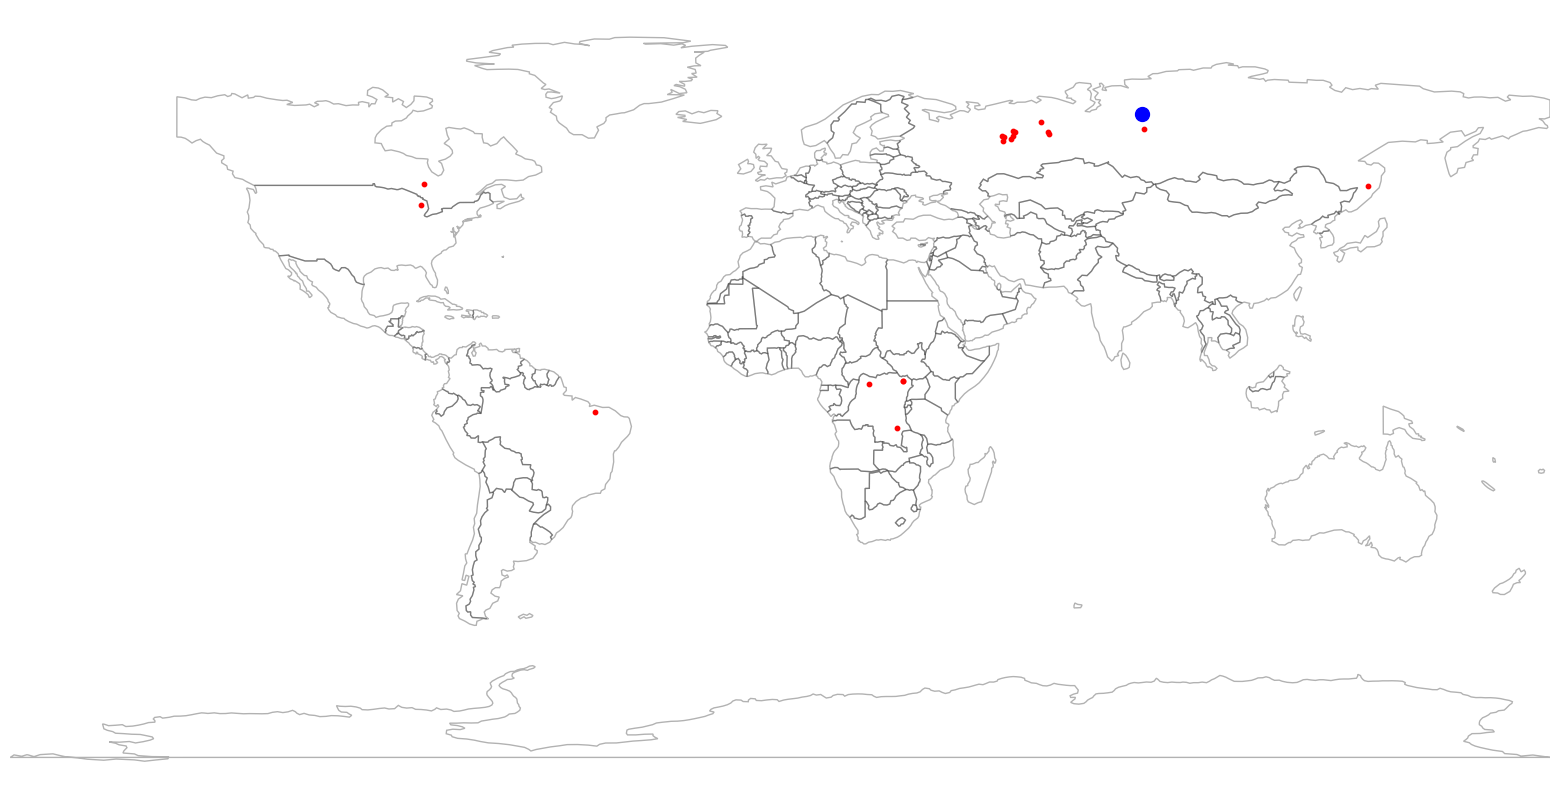

In [106]:
# query point in blue

lonlats = np.r_[[np.r_[i] for i in top20.lonlat.values]]

ax = plt.figure(figsize=(20,10)).subplots(1,1)
gplt.polyplot(world, alpha=0.3,  ax=ax)
plt.scatter(lonlats[:,0], lonlats[:,1], color='red', alpha=1, s=10)
plt.scatter(*z['lonlat'], color='blue', s=100)